/tmp/ipykernel_1350662/3443892548.py:21: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  scaler_train = scaler_train.groupby('knight').apply(lambda x: x)


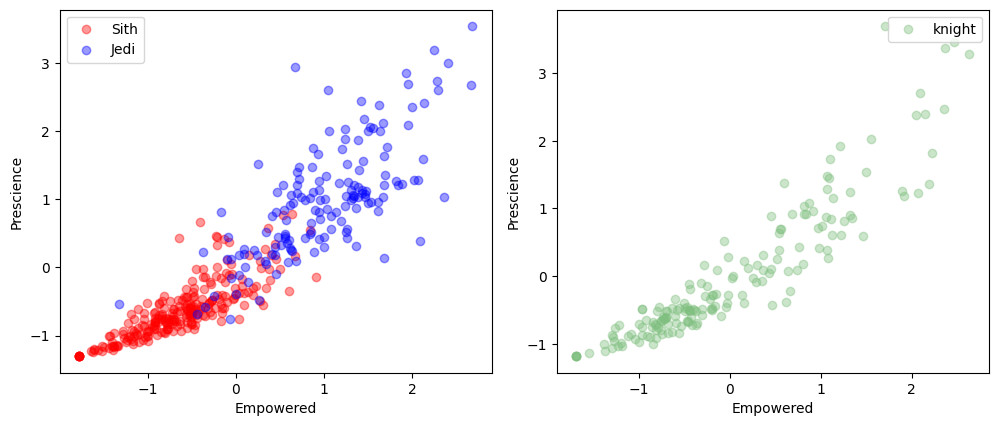

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
# 1) Charger les données
train_path = "/home/machouba/CC_42/Train_knight.csv"
test_path  = "/home/machouba/CC_42/Test_knight.csv"
df_train = pd.read_csv(train_path)
df_test  = pd.read_csv(test_path)
# 2) Standardiser les données TEST
objet = StandardScaler()
data_test = objet.fit_transform(df_test)
scaler_test = pd.DataFrame(data_test, columns=df_test.columns)
# 3) Parser les données TRAIN
data_train = df_train[df_train.columns[:-1]]
knight = df_train['knight']
# 4) Standardiser les données TRAIN
data_train = objet.fit_transform(data_train)
scaler_train = pd.DataFrame(data_train, columns=df_train.columns[:-1])
scaler_train = scaler_train.join(knight)
scaler_train = scaler_train.groupby('knight').apply(lambda x: x)
# 5) Visualiser les données TRAIN et TEST
fig = plt.figure(figsize=(25,25))

plot = plt.subplot2grid((6, 5), (0, 0), fig=fig)

plot.scatter(scaler_train['Empowered']['Sith'], scaler_train['Prescience']['Sith'], label='Sith', color='red', alpha=0.4)
plot.scatter(scaler_train['Empowered']['Jedi'], scaler_train['Prescience']['Jedi'], label='Jedi', color='blue', alpha=0.4)
plot.set_xlabel('Empowered')
plot.set_ylabel('Prescience')
plot.legend()

plot = plt.subplot2grid((6, 5), (0, 1), fig=fig)

plot.scatter(scaler_test['Empowered'], scaler_test['Prescience'], label='knight', color='#7fbf7f', alpha=0.4)
plot.set_xlabel('Empowered')
plot.set_ylabel('Prescience')
plot.legend()
plt.tight_layout()
plt.show()